## Ejercicio breast cancer de sklearn

1. Carga el dataset [breast_cancer de `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
2. Prueba diferentes modelos de clasificación vistos en clase, escoge el que mejor resultado tenga en base a la métrica que escogas (recomendación: F1 score).
3. Optimiza los hyperparametros del modelo usando GridSearchCV.
4. (Opcional) Repite los puntos 2 y 3 utilizando un pipeline. 

In [1]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [4]:
import pandas as pd
import numpy as np

In [41]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target

In [42]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [43]:
df.info

<bound method DataFrame.info of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean con

In [44]:
df.isna().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
target    

In [45]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [46]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [47]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [16]:
import seaborn as sns

<AxesSubplot:>

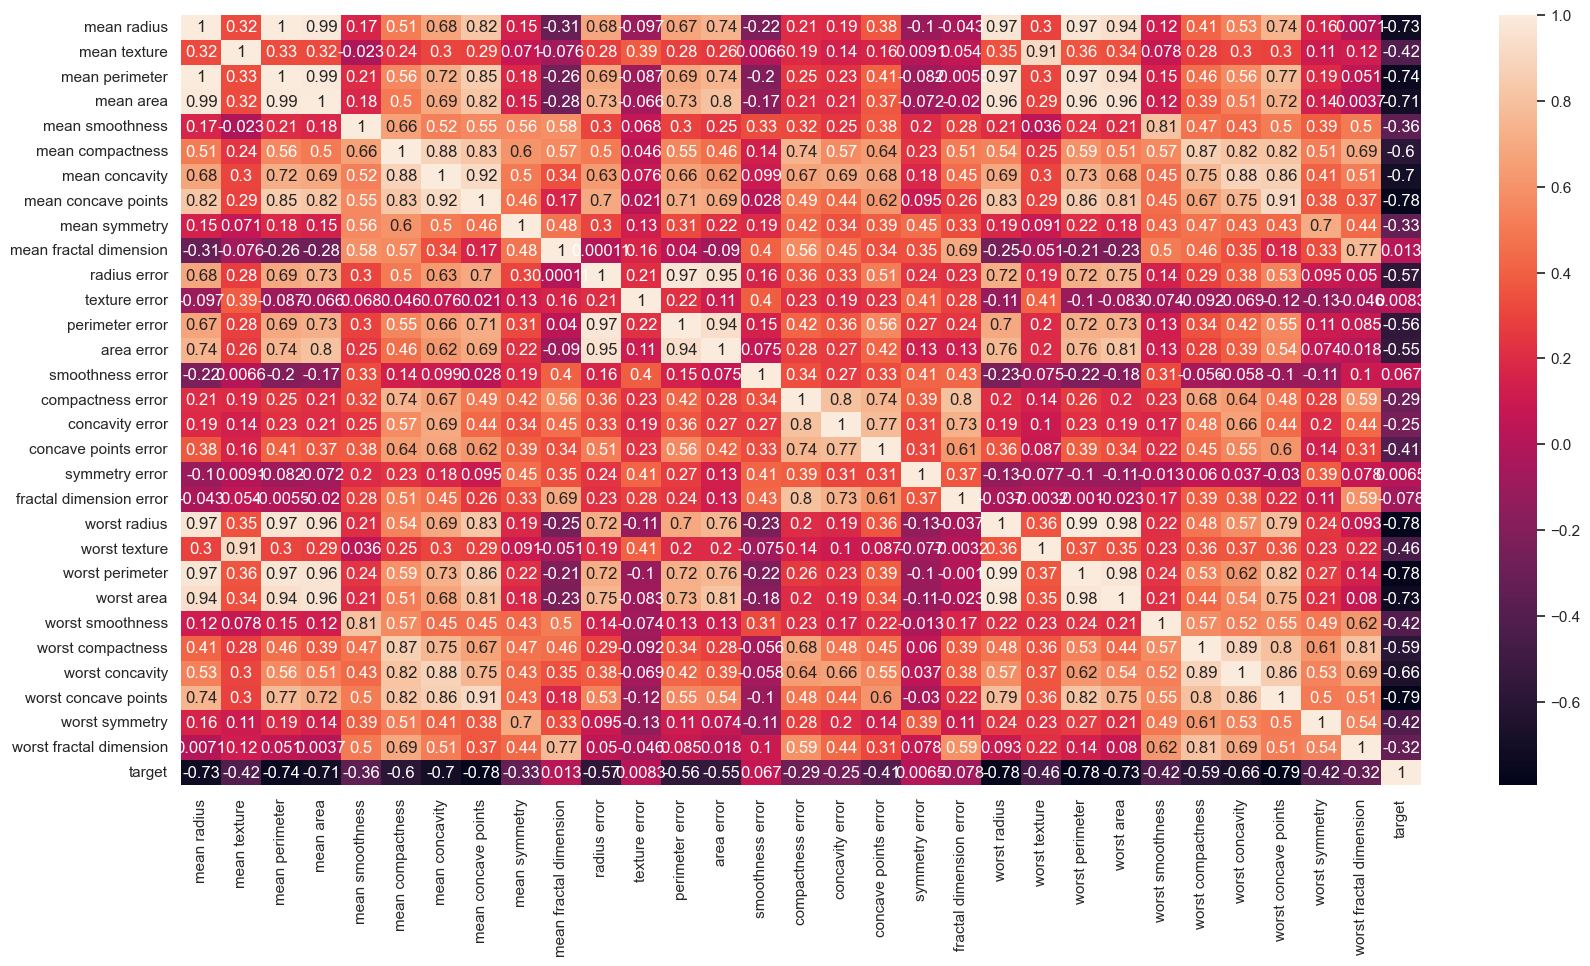

In [48]:
sns.set(rc = {'figure.figsize': (20,10)})
sns.heatmap(df.corr(), annot=True)

In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
x = df.drop(columns=["target"])
y = df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
rforest = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 random_state=42)
rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)
accuracy_score(y_test,y_pred)                      

0.9649122807017544

In [56]:
rforest.feature_importances_

array([0.04572569, 0.01503479, 0.04373684, 0.04062285, 0.00675496,
       0.01162006, 0.05140053, 0.11749004, 0.0031101 , 0.00419058,
       0.01628776, 0.00359733, 0.0090182 , 0.03324043, 0.00421943,
       0.00437322, 0.00695527, 0.0050287 , 0.00483065, 0.00569513,
       0.0827079 , 0.02055216, 0.11422416, 0.12205692, 0.01164241,
       0.0155346 , 0.03919827, 0.14446755, 0.01142469, 0.00525882])

In [58]:
import matplotlib.pyplot as plt

<BarContainer object of 30 artists>

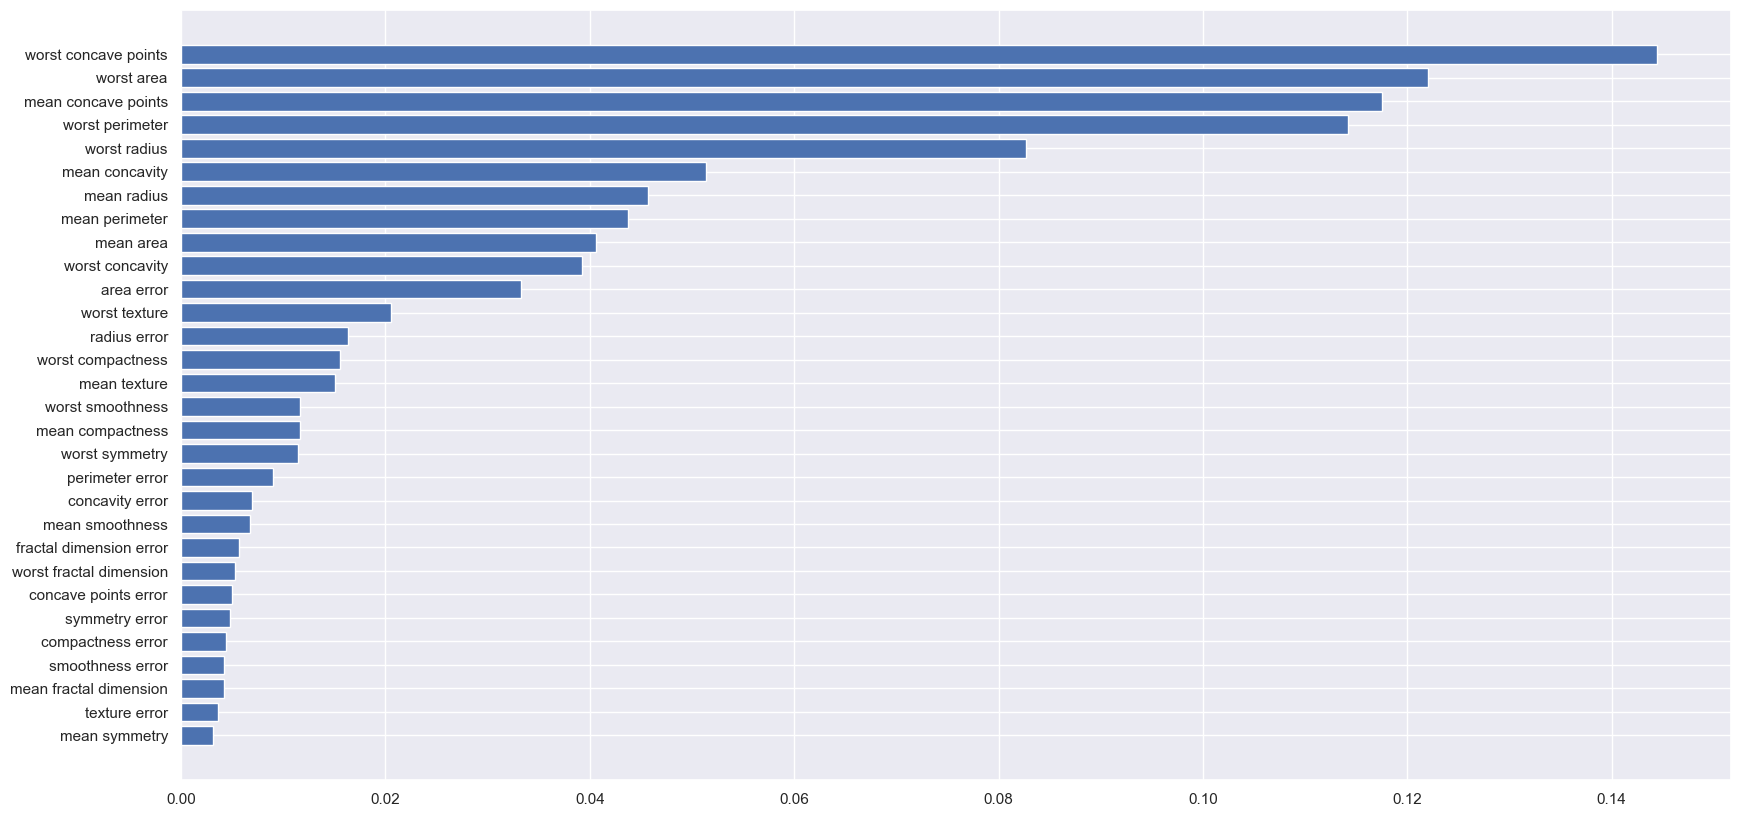

In [62]:
#Feature Importance
sort = rforest.feature_importances_.argsort()
plt.barh(cancer.feature_names[sort], rforest.feature_importances_[sort])

In [64]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
seed = 2023

In [69]:
estimator = DecisionTreeClassifier(max_depth=1)

ada_clf = AdaBoostClassifier(base_estimator = estimator,
                             n_estimators=200,
                             learning_rate=0.5,
                             random_state=seed)

ada_clf.fit(x_train, y_train)

ada_pred = ada_clf.predict(x_test)
accuracy_score(y_test, ada_pred)

0.9736842105263158

In [72]:
#SVM
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [74]:
svm = SVC(C=100, random_state=seed, max_iter= 10000)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
accuracy_score(y_test, svm_pred)

0.9824561403508771

In [75]:
#Grid Search
from sklearn.model_selection import GridSearchCV

#Ada Boost
ada = AdaBoostClassifier(random_state=seed)
param_ada = {
    "n_estimators": [10,20,40,60,80,100,200],
    "learning_rate": [0.1, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "algorithm": ["SAMME", "SAMME.R"]
}
grid_ada = GridSearchCV(estimator=ada, param_grid=param_ada, cv=10)
grid_ada.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=2023),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8,
                                           0.9, 1],
                         'n_estimators': [10, 20, 40, 60, 80, 100, 200]})

In [76]:
print("Mejores parámetros:", grid_ada.best_params_,)
print("Score:", grid_ada.best_score_)

Mejores parámetros: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 200}
Score: 0.9845893719806764


In [77]:
# Random Forest
grid_arbolito = RandomForestClassifier(random_state=seed)
param_arbolito = {
    "n_estimators": [10,20,40,60,80,100],
    "max_depth": [2,4,6,8,10],
    "max_features": [2,3,4,5,6,7,8],
    "min_samples_leaf": [2,4,6,8,10],
    "min_samples_split": [2,4,6,8,10]
}
grid_arbol = GridSearchCV(estimator=grid_arbolito,param_grid=param_arbolito, cv=10)
grid_arbol.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2023),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 20, 40, 60, 80, 100]})

In [78]:
print("Mejores parámetros:", grid_arbol.best_params_,)
print("Score:", grid_arbol.best_score_)

Mejores parámetros: {'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Score: 0.9691787439613526


In [79]:
# SVM
grid_svm = SVC(random_state=seed)
param_svm = {
    "C":[1, 10,100,1000],
    "gamma": [1, 0.1, 0.01, 0.001],
    "kernel":["rbf", "linear",]
}
grid_svm = GridSearchCV(estimator=grid_svm, param_grid=param_svm, cv=10)
grid_svm.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=2023),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']})

In [80]:
print("Mejores parámetros:", grid_svm.best_params_,)
print("Score:", grid_svm.best_score_)

Mejores parámetros: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
Score: 0.9647826086956522


In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [89]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("rforest", RandomForestClassifier(n_estimators=100)),
    ("Ada", AdaBoostClassifier(n_estimators=200)),
    ("svm", SVC(C=100))
])
pipe.fit(x_train,y_train)

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'RandomForestClassifier()' (type <class 'sklearn.ensemble._forest.RandomForestClassifier'>) doesn't